# Import libraries

In [1]:
import sys
from itertools import product
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "WellsCoppersmith1994"
sys.path.append(str(MODEL_DIR))

import run_max_displacement

# Run Maximum Displacement

## Single scenarios

A single scenario is defined as one magnitude/percentile/style. The default percentile is "0.5" and the default style is "all". Here is an example (note all parameters must be passed as keyword arguments).

In [3]:
df = run_max_displacement.run_md(magnitude=7,)
df

,magnitude,style,percentile,mu,sigma,max_displ
0,7.0,all,0.5,0.28,0.42,1.905461


In [4]:
df = run_max_displacement.run_md(magnitude=7, percentile=0.84, style="strike-slip")
df

,magnitude,style,percentile,mu,sigma,max_displ
0,7.0,strike-slip,0.84,0.18,0.34,3.296975


The "reverse" model is not recommended by the authors and the user will be warned about this:

In [5]:
df = run_max_displacement.run_md(magnitude=7, style="reverse")
df

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\WellsCoppersmith1994\run_max_displacement.py:152: UserWarning: Regressions for reverse-slip relationships are not significant at 95% probability level (per WC94). Use with caution.
  warnings.warn(msg)


,magnitude,style,percentile,mu,sigma,max_displ
0,7.0,reverse,0.5,0.19,0.42,1.548817


## Multiple scenarios

Multiple magnitude/percentile/style scenarios can be run. All combinations are run. Note that `percentile=-1` returns the mean. Here is an example.

In [6]:
df = run_max_displacement.run_md(magnitude=7, percentile=[0.16, 0.5, 0.84, -1])
df

,magnitude,style,percentile,mu,sigma,max_displ
0,7.0,all,0.16,0.28,0.42,0.728329
1,7.0,all,0.50,0.28,0.42,1.905461
2,7.0,all,0.84,0.28,0.42,4.985082
3,7.0,all,-1.00,0.28,0.42,3.041501


## Create magnitude scaling plots

In [7]:
magnitudes = np.arange(5, 8.7, 0.2)
styles = ["Strike-Slip", "Normal", "Reverse", "All"]

results = run_max_displacement.run_md(magnitude=magnitudes, style=styles)
results.head()

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\WellsCoppersmith1994\run_max_displacement.py:152: UserWarning: Regressions for reverse-slip relationships are not significant at 95% probability level (per WC94). Use with caution.
  warnings.warn(msg)


,magnitude,style,percentile,mu,sigma,max_displ
0,5.0,strike-slip,0.5,-1.880,0.34,0.013183
1,5.0,normal,0.5,-1.450,0.38,0.035481
2,5.0,reverse,0.5,-0.390,0.42,0.407380
3,5.0,all,0.5,-1.360,0.42,0.043652
4,5.2,strike-slip,0.5,-1.674,0.34,0.021184


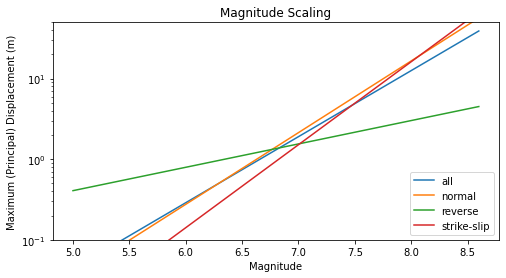

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for sof, group in results.groupby(["style"]):
    group = group.sort_values(by="magnitude")
    ax.semilogy(group["magnitude"], group["max_displ"], label=sof)

ax.set(
    xlabel="Magnitude",
    ylabel="Maximum (Principal) Displacement (m)",
    title="Magnitude Scaling",
)
ax.set_ylim([0.1, 50])
ax.legend(loc="lower right");